<div align="center">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<center><img border="0" src="https://team.inria.fr/cedar/files/2019/09/Logo-horizontal-E%CC%81cole-IP-Paris-Pantone-01.png" width="60%"></center> </td></tr>
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<center><img border="0" src="https://www.seekpng.com/png/full/211-2116074_lawyer-clipart-law-firm-court-reporting-clipart.png" width="15%"></center> </td>
  </tr>

</table> 
</div>

<br><br>
<center><h1>Auto judge challenge</h1></center>
<br><br>
<center><h2>Team 6: Laurine Burgard-Lotz, Emilien Grillot, Riad El Otmani, Louis Grenioux, Karim Kassab, Walid Yassine</h2></center>

# <center> Table of Contents </center>

1. [Introduction](#Introduction)
2. [Aim of the challenge](#Aim-of-the-challenge)
3. [Metrics](#Metrics)
4. [Data](#Data)
    - What is oyez?
    - Gathering the data
    - Dataset
    - Explanation of some features
5. [Data cleaning and preparing](#Data-cleaning-and-preparing)
    - Loading the data
    - Interesting columns
    - Term data
    - Dictionnary data
    - Text part
    - Duplicates
    - Homogenization
6. [Visualization and insights](#Visualization-and-insights)
    - Distribution of the cases over the years
    - Repartition of the winners across parties over the years
    - Distribution of majority and minority votes
    - Repartition of the decision type
    - Repartition of the disposition type
    - Repartition of the cases over the states
7. [Feature engineering](#Feature-engineering)
    - Classify party names
    - Plot location
    - Process heard_by and decided_by
    - Build the final outputs
8. [Base Models](#Base-Models)
    - Preparing the data and choosing the columns
    - Naive Bayes
    - K-Nearest Neighbors

#  Introduction

When dealing with serious governmental issues, reaching the supreme court today requires resources that are not available for everyone. While governments claim fairness and equality between all, accessing such an institute is not at the hand of everybody.  
Also, since reaching the supreme court costs a fortune, with which there is no guarantee over the outcome, having a way to simulate and get insights about what a potential supreme court decision might be over a particular case would be a way to level the playing field among social classes.

# Aim of the challenge

The Auto judge challenge aims at overcoming the unfairness mentioned above, by enabling people to assess the supreme court judgement and predicting a potential outcome of their case.

The main objective of the challenge is to leverage the predictive power of machine learning in jurisdictional contexts. This objective is accomplished by having a digitalized version of the supreme court cases as a training dataset, which will be used in the context of a binary classification problem, by predicting the outcome of a trial.

The real outcome of the case consists of precising several features (winning_pary, decision_type, disposition). However, in the context of this challenge, and to make the problem more _intuitive_, we decided to keep it as a binary classification problem by predicting the winning party.

# Metrics

Since we defined the problem as a binary classification problem (predicting the winning party), the choice of the right metric is essential in order to make sure we're taking into account not only "correct" classifications, but also the imbalanced aspects of the problem (which will be illustrated later in the notebook).  
To do this, we need to consider a metric that takes into account not only the relevant instances among the retrieved instances (i.e. the precision), but also the fraction of relevant instances that were retrieved (i.e. the recall).<br>  
Consequently, we will use the F1-score (defined below) as an evaluation metric of our model, since it takes both the precision and recall into consideration.  
The intuition behind this decision is that the F1-score will also take into account the imbalance of the dataset, unlike computing the accuracy directly, which may have a high value even if the model has mostly wrong classifications on a minority class.  
<br><br>
$$F_1 = 2 \frac{\text{precision} . \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{1}{2} (FP + FN)}$$

where
<br>$\quad TP$: Number of True Positives
<br>$\quad FP$: Number of False Positives
<br>$\quad FN$: Number of False Negatives

# Data



<!-- In order to gather appropriate data for this challenge, we did extensive research in regards to historical supreme court rulings. One framework that provided access to such data is the<a href="https://www.oyez.org/"> **Oyez** </a>website. -->

*Our inspiration*

Very few people have built a proper dataset for such a task. Luckily, a recent paper called [JUSTICE: A Benchmark Dataset for Supreme Court's Judgment Prediction](https://arxiv.org/abs/2112.03414) by *Mohammad Alali, Shaayan Syed, Mohammed Alsayed, Smit Patel* and *Hemanth Bodala* actually did it. Without really looking at the output of their research, we decided to use the [Oyez API](https://www.oyez.org/) with their scrapper.

*What is Oyez ?*

Oyez is a multimedia archive devoted to making the Supreme Court of the United States accessible to everyone. It offers extensive details about each case treated by the supreme court (information about the judges, lawyers, decisions, opinions, facts and also audio recordings of the procedure, ...).

*Gathering the Data*

In order to gather the dataset for this challenge, we fetched the case data fomr the oyez.org website using async get requests and we save the results as a dataframe in a pickle file `data_scrapped.pkl`.

## Dataset

The dataset contains a relatively big amount of features. These features are illustrated in the figure below, under the following notations:
- For the default features, **features in bold** are the features that we decided to keep for the rest of this notebook, and the other ones will be discarded or used to extract more meaningful features. For example the docket number is a unique identifier for each case, its uniqueness brings no special information that can be learned by the model, therefore it is discarded.
- For the extracted features, they are constructed based on the dropped features. For example the "decisions" feature, which is a list of dictionaries, has been discarded in favor of the content of the dictionaries (majority vote, minority vote, winning party, decision type, disposition)

<table><tr> 
    <td><div align="center"> Default features </div></td>
    <td> <div align="center"> Extracted Features </div></td>
    </tr><tr>
<td><ul>
<div align="left">
<li><b>ID</b><br>
<li><b>name</b><br>
<li><b>href</b><br>
<li>view_count<br>
<li>docket_number<br>
<li>additional_docket_numbers<br>
<li>manner_of_jurisdiction<br>
<li><b>first_party</b><br>
<li><b>second_party</b><br>
<li>timeline<br>
<li>lower_court<br>
<li><b>facts_of_the_case</b><br>
<li><b>question</b><br>
<li><b>conclusion</b><br>
<li><b>advocates</b><br>
<li>oral_argument_audio<br>
<li>citation<br>
<li>decisions<br>
<li><b>first_party_label</b><br>
<li><b>second_party_label</b><br>
<li><b>heard_by</b><br>
<li><b>decided_by</b><br>
<li><b>term</b><br>
<li>location<br>
<li>opinion_announcement<br>
<li><b>description</b><br>
<li>written_opinion<br>
<li>related_cases<br>
<li>justia_url<br>
<li>argument2_url<br>
<li>opinions<br>
    </div>
    </ul>
    </td>
    <td>
        <ul><div align="left">
<li><i> votes</i><br>
<li><i> majority_vote</i><br>
<li><i> minority_vote</i><br>
<li><i> winning_party</i><br>
<li><i> disposition</i><br>
<li><i> decision_type</i><br>
<li><i> unconstitutionality</i><br>
<li><i> alteration_of_precedent</i><br>
<li><i> latitude</i><br>
<li><i> longitude</i><br>
<li><i> city</i><br>
<li><i> province</i><br>
<li><i> province_name</i><br>
            <li><i> winning_index</i><br></div></ul>
    </td></tr></table>

**Note**: Other features will also be added later in the notebook in the feature engineering section.

## Explanation of some features


Since some of the features are directly related to the juridical vocabulary, we felt the need to explain some of them in order to justify some decisions that we made during the establishment of this challenge.

### About `decision_type`

`decision_type` is related to the way the final decision was taken and can have the following values

- `majority` : the decision on that case was shared by more than half of the members of a court 
- `per curiam` : the decision is resulting from a short collective decision between multiple judges 
- `plurality opinion` : the decision received the most votes compared to other options but not enough to be the majority opinion
- `equally divided` : in case of equality between votes
- `dismissal` : a dismissed case means that a lawsuit is closed with no finding of guilt and no conviction for the defendant in a criminal case by a court of law. It has several sub-categories, such as:  
    - `dismissal-moot`
    - `dismissal-rule 46`
    - `dismissal-other`
    - `dismissal`
    - `improvidently granted`
- `memorandum` : a memorandum decision is usually very short and does not include the court's reasoning or explanation for reaching the result.

### About the `disposition`

The disposition can be one the following :

- `affirmed`: lower court judgment was correct
- `reversed`: lower court judgment was incorrect
- `remanded`: send case back to lower court
- `vacated`: lower court judgment has been cancelled or rendered void

Note that the other features are somehow clear.However, for any extra clarification, one can visit the [Oyez Website](https://oyez.org) or [Wikipedia](https://en.wikipedia.org/wiki/Judicial_opinion) for more explanations.

### Libraries to import

In [1]:
!pip install geopandas requests-cache textdistance
!pip install textdistance

     |████████████████████████████████| 1.0 MB 16.6 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 46.6 MB/s 
     |████████████████████████████████| 16.7 MB 44.4 MB/s 
     |████████████████████████████████| 138 kB 51.9 MB/s 
     |████████████████████████████████| 127 kB 72.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Libraries
from PIL import Image
from bs4 import BeautifulSoup
from io import BytesIO
from ipywidgets import interact, fixed
from textdistance import levenshtein
import difflib
import geopandas as gpd
import json
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests_cache
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet 
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import re  #regular expression
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Data cleaning and preparing

## Loading the data

In [152]:
# change the root directory according to the position of the file
root_directory = 'data/'
df_data = pd.read_pickle(root_directory + 'data_scrapped.pkl')
df_data.head()

ID                                       name  \
0  49891  Central Bank & Trust Co. v. United States   
1  50601                           Humphrey v. Cady   
2  50602                Ivan V. v. City of New York   
3  49422                        Gills v. California   
4  50603                             Healy v. James   

                                      href  view_count docket_number  \
0     https://api.oyez.org/cases/1967/1269           0          1269   
1  https://api.oyez.org/cases/1971/70-5004           0       70-5004   
2  https://api.oyez.org/cases/1971/71-6425           0       71-6425   
3     https://api.oyez.org/cases/1966/1043           0          1043   
4   https://api.oyez.org/cases/1971/71-452           0        71-452   

  additional_docket_numbers     manner_of_jurisdiction  \
0                      None  Writ of <i>certiorari</i>   
1                      None  Writ of <i>certiorari</i>   
2                      None  Writ of <i>certiorari</i>   
3                      None  Writ of <i>certiorari</i>   
4                      None  Writ of <i>certiorari</i>   

                first_party      second_party  \
0  Central Bank & Trust Co.     United States   
1                  Humphrey              Cady   
2                   Ivan V.  City of New York   
3                     Gills        California   
4                     Healy             James   

                                            timeline  ...  \
0  [{'event': 'Decided', 'dates': [-50439600], 'h...  ...   
1  [{'event': 'Argued', 'dates': [60933600], 'hre...  ...   
2  [{'event': 'Decided', 'dates': [77173200], 'hr...  ...   
3  [{'event': 'Decided', 'dates': [-81284400], 'h...  ...   
4  [{'event': 'Argued', 'dates': [70610400], 'hre...  ...   

                                          decided_by  term location  \
0  {'ID': 15305, 'name': 'Warren Court (1967-1969...  1967     None   
1  {'ID': 15330, 'name': 'Burger Court (1972-1975...  1971     None   
2  {'ID': 15330, 'name': 'Burger Court (1972-1975...  1971     None   
3  {'ID': 15294, 'name': 'Warren Court (1965-1967...  1966     None   
4  {'ID': 15330, 'name': 'Burger Court (1972-1975...  1971     None   

  opinion_announcement description  \
0                 None        None   
1                 None        None   
2                 None        None   
3                 None        None   
4                 None        None   

                                     written_opinion related_cases  \
0  [{'id': 12425, 'title': 'Syllabus', 'author': ...          None   
1  [{'id': 11375, 'title': 'Syllabus', 'author': ...          None   
2  [{'id': 11255, 'title': 'Syllabus', 'author': ...          None   
3  [{'id': 12695, 'title': 'Syllabus', 'author': ...          None   
4  [{'id': 11211, 'title': 'Syllabus', 'author': ...          None   

                                          justia_url argument2_url  \
0  https://supreme.justia.com/cases/federal/us/39...          None   
1  https://supreme.justia.com/cases/federal/us/40...          None   
2  https://supreme.justia.com/cases/federal/us/40...          None   
3  https://supreme.justia.com/cases/federal/us/38...          None   
4  https://supreme.justia.com/cases/federal/us/40...          None   

                                            opinions  
0  [{'id': 12426, 'title': 'View Case', 'author':...  
1  [{'id': 11376, 'title': 'View Case', 'author':...  
2  [{'id': 11256, 'title': 'View Case', 'author':...  
3  [{'id': 12696, 'title': 'View Case', 'author':...  
4  [{'id': 11212, 'title': 'View Case', 'author':...  

[5 rows x 31 columns]

By quickly looking at the data, we notice that some entries are None while some are empty strings/list and thus not counted as None. We fix this issue thanks to the following lines of code:

In [8]:
df_data=df_data.replace({'': np.nan}, regex=True)
cols = ['timeline', 'decisions', 'advocates', 'heard_by']
for col in cols:
  df_data[col] = df_data[col].apply(lambda x: np.nan if (x is None or len(x)==0) else x)

### Interesting columns

In [9]:
columns = list(df_data.columns)

As mentionned before, we can see that the data contains several features:

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         8238 non-null   int64 
 1   name                       8238 non-null   object
 2   href                       8238 non-null   object
 3   view_count                 8238 non-null   int64 
 4   docket_number              8238 non-null   object
 5   additional_docket_numbers  228 non-null    object
 6   manner_of_jurisdiction     8238 non-null   object
 7   first_party                8233 non-null   object
 8   second_party               8218 non-null   object
 9   timeline                   8238 non-null   object
 10  lower_court                6436 non-null   object
 11  facts_of_the_case          3561 non-null   object
 12  question                   3563 non-null   object
 13  conclusion                 3497 non-null   object
 14  advocate

In all this columns, some can be eliminated since only a few are of real interest to us:

*  The `ID`,`name` and `href` of the case will allow us to identify it,
*  The `first` and` second party` (and their associated `labels`), which respectively designates the party that brings a lawsuit and the party against whom the case was brought,
* The `timeline` which identifies the dates of the different procedures,
* The `location`, which can also influence the final decision, 
* The people involve in the case (`advocates`,`heard_by`,`decided_by`)
* The `facts of the case`, `question` and `conclusion`,
* The final `decisions` and the `term `





In [11]:
# Keep only a few columns
to_keep = [
          'ID',
          'name',
          'href',
          'first_party',
          'second_party',
          'first_party_label',
          'second_party_label',
          'timeline',
          'location',
          'facts_of_the_case',
          'question',
          'conclusion',
          'decisions',
          'advocates',
          'heard_by',
          'decided_by',
          'term'
]
df_interesting_data = df_data[to_keep]
df_interesting_data.shape

(8238, 17)

Moreover, we have to pay attention to missing data and to actual data types (a lot of data are actually dictionaries where not all information is useful):

In [12]:
df_interesting_data.isna().sum() 

ID                       0
name                     0
href                     0
first_party              5
second_party            20
first_party_label        0
second_party_label       0
timeline                 0
location              6420
facts_of_the_case     4677
question              4675
conclusion            4741
decisions              295
advocates             2748
heard_by                 0
decided_by             128
term                     0
dtype: int64

Because we are intersted in using some machine learning processes as well as NLP methods, we remove all the columns where the facts of the case are missing. Plus we pay attention to keep only those where the decision has already been made.

In [13]:
# Some element from the lists composing a timeline are None, we remove them
df_interesting_data.loc[:,'timeline']= df_interesting_data['timeline'].apply(lambda x: list(filter(None, x)))
# We create a column finished, where True if the case has been decided, False else
df_interesting_data.loc[:,'finished'] = df_interesting_data['timeline'].apply(lambda x: (np.array([x[i]['event'] == 'Decided' for i in range(len(x))])).any())
df_interesting_data.loc[:,'finished'] = df_interesting_data['finished'].replace({False: np.nan}, regex=True)

In [14]:
df_interesting_data.dropna(subset = ['facts_of_the_case','decisions','finished', 'first_party', 'second_party'], inplace=True)
df_interesting_data.shape

(3307, 18)

We don't need `finished` and `timeline` anymore:

In [15]:
df_interesting_data.drop(columns=['timeline', 'finished'], inplace=True)

Let us look at the type of our data :

In [16]:
for col in df_interesting_data.columns:
  print(col, ':', type(df_interesting_data[col].to_numpy()[2]))

ID : <class 'numpy.int64'>
name : <class 'str'>
href : <class 'str'>
first_party : <class 'str'>
second_party : <class 'str'>
first_party_label : <class 'str'>
second_party_label : <class 'str'>
location : <class 'dict'>
facts_of_the_case : <class 'str'>
question : <class 'str'>
conclusion : <class 'str'>
decisions : <class 'list'>
advocates : <class 'list'>
heard_by : <class 'list'>
decided_by : <class 'dict'>
term : <class 'str'>


### Term data

First we notie that the term date is a `string` while it should be an `int`. Furthermore, while taking a closer look at the data, we notice that for old cases, the year was ambiguous (specified by a range of years) for an insignificant number of cases.

In [17]:
print("The 7 oldest terms in the dataset are: ")
print(sorted(df_interesting_data['term'].unique())[:7])

The 7 oldest terms in the dataset are: 
['1789-1850', '1850-1900', '1900-1940', '1940-1955', '1955', '1956', '1957']


To avoid dropping these cases and be able to  deal numerically with the year field, we will replace the year for these instances by their median value. The we convert the values to int.

In [18]:
# Replacing the range values of terms with the middle value to be representative for this range
df_k = pd.DataFrame(df_interesting_data[df_interesting_data['term'].str.contains('-')]['term'].str.split('-').tolist(),
                    columns=['start', 'end']).astype({'start': 'int32', 'end': 'int32'})

df_interesting_data.loc[df_interesting_data['term'].str.contains('-'),'term'] = df_k.mean(axis=1).round().astype(int).values

# changing all the values to int
df_interesting_data['term'] = df_interesting_data['term'].astype(int)

### Dictionnary data

Some features, such as `location` and `decided_by`, are dictionaries containing 'sub features'. 

Plus, by looking at the data by hands, we notice that `decisions` can be a list longer than 1 while all the elements in the list are the same (except the textual description when there is one, which is rare). So we only keep the first element in the list:

In [19]:
df_interesting_data['decisions']= df_interesting_data['decisions'].apply(lambda x: x[0])

For the columns which are dictionnaries, we create sub-dataframe and keep data that interest us:

In [20]:
cols=['decisions','location', 'decided_by'] 
new_dfs = []
for col in cols:
  print('######',col,'#######')
  df = df_interesting_data[col].apply(pd.Series)
  new_dfs.append(df)
  print(df.isna().sum())

###### decisions #######
description                2478
votes                        10
majority_vote                 0
minority_vote                 0
winning_party               883
disposition                  72
decision_type                 7
unconstitutionality           0
alteration_of_precedent       0
dtype: int64
###### location #######
latitude         1516
longitude        1516
name             1554
street           1766
city             1665
province         1686
postal_code      2692
province_name    1686
dtype: int64
###### decided_by #######
ID             20
name           20
href           20
view_count     20
members        20
court_start    20
images         20
identifier     20
dtype: int64


All the info from `decisions` look interesting, let's keep them. 

In [21]:
df_interesting_data = pd.concat([df_interesting_data.drop(['decisions'], axis=1), new_dfs[0]], axis=1)

Same for the location:

In [22]:
loc_df = new_dfs[1].loc[:, ['latitude', 'longitude','city', 'province', 'province_name']]

We want to have a winning party at the end, so we remove the missing lines.

In [23]:
df_interesting_data = pd.concat([df_interesting_data.drop(['location'], axis=1), loc_df], axis=1)
df_interesting_data.dropna(subset = ['winning_party'], inplace=True)

### Text part 

Now we can explore textual data, especially facts of the case:

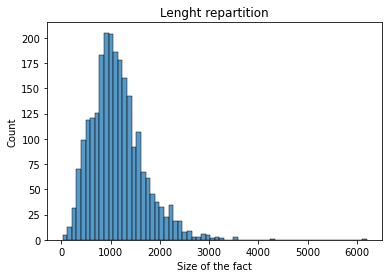

In [24]:
def lenght_dist(tab, title='Lenght repartition'):
  len_vectorize=np.vectorize(len)
  lens = sorted(len_vectorize(tab))
  sns.histplot(lens)
  plt.xlabel('Size of the fact')
  plt.title(title)
  plt.show()
lenght_dist(df_interesting_data['facts_of_the_case'].to_numpy())

Surprisingly some facts are very short. Let's take a closer look at these facts:

In [25]:
##look at fact of less than 10 words
for idx, fact in enumerate(df_interesting_data['facts_of_the_case']):
  if len(fact.split())<10:
    print(idx,fact)

642 <p>Currently unknown.</p>

1684 <p><em>Not Available.</em></p>



We can remove these two facts

In [26]:
df_interesting_data = df_interesting_data.reset_index()
df_interesting_data = df_interesting_data.drop(labels=[642, 1684], axis=0)

We also notice HTML tags that we should remove. We take the opportunity to remove anything that could be noise for our model.

In [27]:
stopword_list = stopwords.words('english')
# stemmer = SnowballStemmer('english')
# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()

Here is the pipeline used for the preprocessing:


*   We decide to remove stopword, however we do not lowercase the words in the facts. Indeed some proper noun could be missed then,
*   We remove any special characters thanks to regular expression,
*   We remove every html tags.

Further steps could include stemming, lemmatazing, using NER, ...



In [28]:
def preprocessing(fact):
  words = [word for word in (fact.split()) if not word in stopword_list] #remove extra spaces, stopwords
  fact = re.sub(r'(@.*?)(#.*?)[\s]', ' ', ' '.join(words)) #remove special characters
  fact=re.sub(r"<[^>]*>", "", fact)
  # return set([stemmer.stem(token) for token in fact.split()])
  return fact

In [29]:
columns = ['facts_of_the_case', 'question', 'conclusion']
for col in columns:
  df_interesting_data[col]=df_interesting_data[col].apply(lambda x : None if x is None else preprocessing(x))

### Duplicates ?

All the `ID` are actually different. However, when looking at `name`, we do have 34 duplicates. So how to determine whether two cases are the same? 
Because the most important feature for us is `facts_of_the_case`, we decide to drop any cases with the same *facts*.

In [30]:
Counter((df_interesting_data[['facts_of_the_case']].duplicated()).values)

Counter({False: 2421, True: 1})

In [31]:
col='facts_of_the_case'
for i in np.where((df_interesting_data[[col]].duplicated(keep=False)).values):
  print(df_interesting_data.iloc[i,8])

776    In 1952, Arizona invoked U.S. Supreme Court's ...
784    In 1952, Arizona invoked U.S. Supreme Court's ...
Name: facts_of_the_case, dtype: object


In [32]:
df_interesting_data = df_interesting_data.drop(labels=[784], axis=0)

### Final dataframe

In [33]:
print(df_interesting_data.shape)
df_interesting_data.isna().sum()

(2421, 29)


index                         0
ID                            0
name                          0
href                          0
first_party                   0
second_party                  0
first_party_label             0
second_party_label            0
facts_of_the_case             0
question                      1
conclusion                    3
advocates                   296
heard_by                      0
decided_by                   13
term                          0
description                1606
votes                         6
majority_vote                 0
minority_vote                 0
winning_party                 0
disposition                  19
decision_type                 6
unconstitutionality           0
alteration_of_precedent       0
latitude                   1068
longitude                  1068
city                       1182
province                   1204
province_name              1204
dtype: int64

## Homogenization

We can see that the winning party is not always totally equivalent to the first or second party (eg. **Peter Stanley, Sr.** vs **Stanley**). To remedy this problem, we create a column `winning_index`.

In [34]:
# Compute the distances
levenshtein_distances_first = df_interesting_data.apply(lambda x: levenshtein.distance(x['winning_party'].lower(),  x['first_party'].lower()), axis=1)
levenshtein_distances_second = df_interesting_data.apply(lambda x: levenshtein.distance(x['winning_party'].lower(),  x['second_party'].lower()), axis=1)
 
# Create the new columns
df_interesting_data.loc[:, 'winning_index'] = 1
df_interesting_data.loc[levenshtein_distances_second < levenshtein_distances_first, 'winning_index'] = 2

In [35]:
final_df = df_interesting_data.reset_index()

# Visualization and insights

Now that the data has been cleaned and pre-processed, we are going to start exploring it.

In [36]:
df = final_df

## Facts of the case

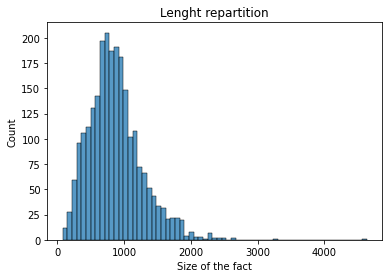

In [37]:
lenght_dist(df['facts_of_the_case'].to_numpy())

We could try to embed the facts to better visualize them. One very simple method is to use TF-IDF algorithm. However, some more powerful algorithms do exist and could be considered here. 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.95,lowercase=True) #,max_features=15000
tf_idf_facts = vectorizer.fit_transform(df['facts_of_the_case'].to_numpy())

[0.00245706 0.00597386]


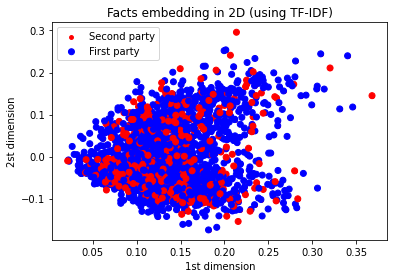

In [39]:
pca = TruncatedSVD(n_components=2)
sentence_embedded = pca.fit_transform(tf_idf_facts)
print(pca.explained_variance_ratio_)
plt.scatter(sentence_embedded[:, 0],sentence_embedded[:,1],c='r', s=15, cmap='cool', label='Second party' )
plt.scatter(sentence_embedded[:, 0],sentence_embedded[:,1],c=['b' if x==1  else 'r' for x in df['winning_index'].values], cmap='cool', label='First party' )
plt.xlabel('1st dimension')
plt.ylabel('2st dimension')
plt.legend()
plt.title('Facts embedding in 2D (using TF-IDF)')
plt.show()

Note that this is just an illustration of some of the possible preprocessing steps that can be implemented.
<br>However, the competitors will have the freedom to consider any other approach.

## Distribution of the cases over the years

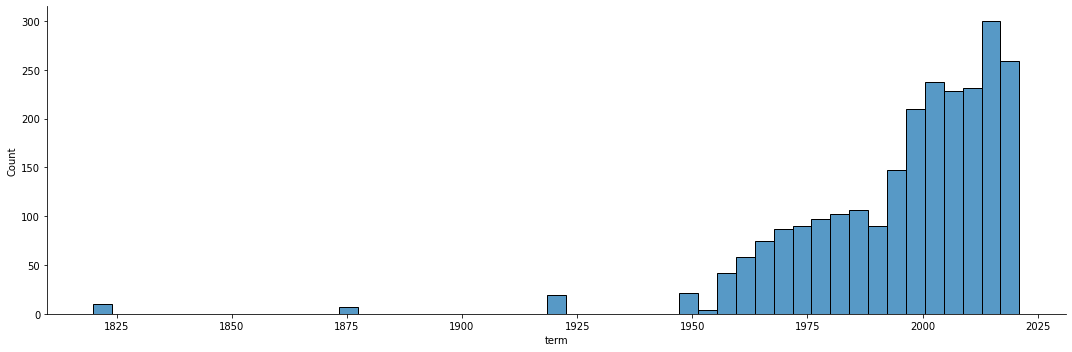

In [40]:
sns.displot(df, x='term',kind='hist',aspect=3)
plt.show()

We can notice that we don't have a lot of cases for the years below 1950. Let's take a more focused look on the cases after these years.


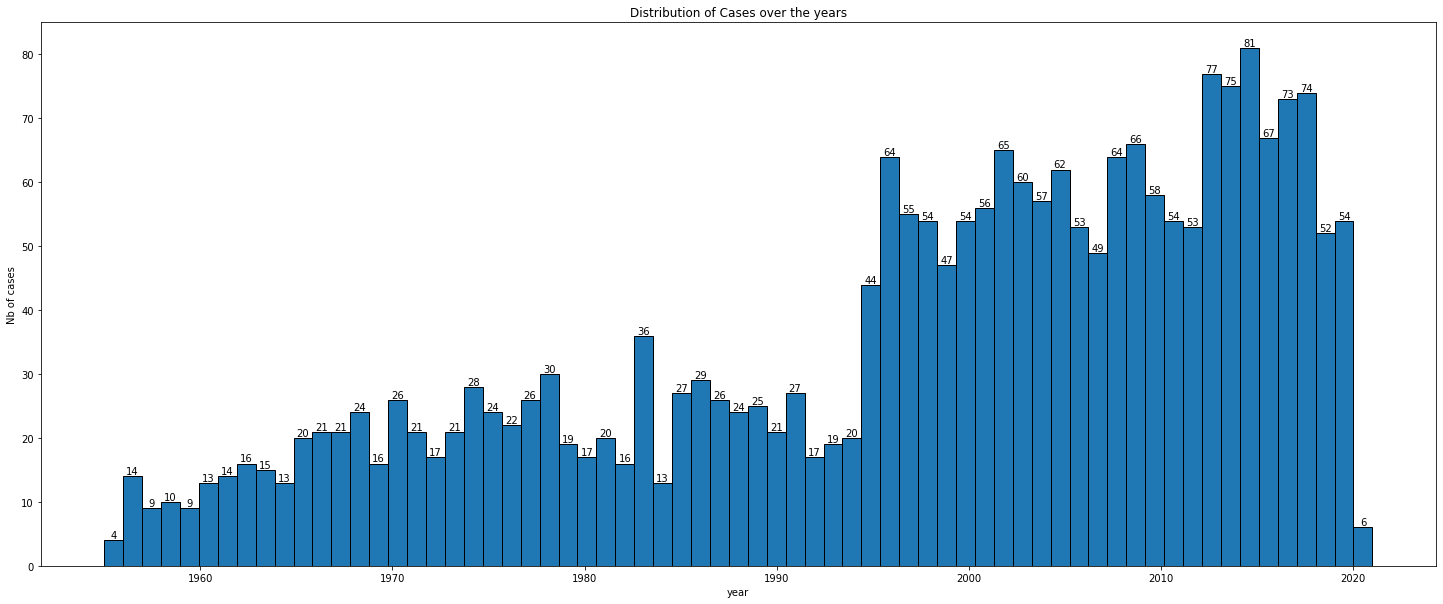

In [41]:
# Creating histogram starting from 1950
truncated_df = df[df['term'] >= 1950]

fig, ax = plt.subplots(1, 1,figsize=(25,10))
ax.hist(truncated_df['term'],bins = truncated_df['term'].unique().size,edgecolor = "black")
  
ax.set_title("Distribution of Cases over the years")
ax.set_xlabel('year')
ax.set_ylabel('Nb of cases')
  
# Make some labels.
rects = ax.patches
labels = truncated_df['term'].value_counts(sort=False).sort_index().values
# labels = [i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
plt.show()

We can see that most of the cases lie between 1995 and 2020.


Moreover, there are only 6 cases in 2021. This might be due to the fact that not all entries of 2021 have been registered on the oyez site, from which we are doing the scrapping.

## Repartition of the winners across parties over the years

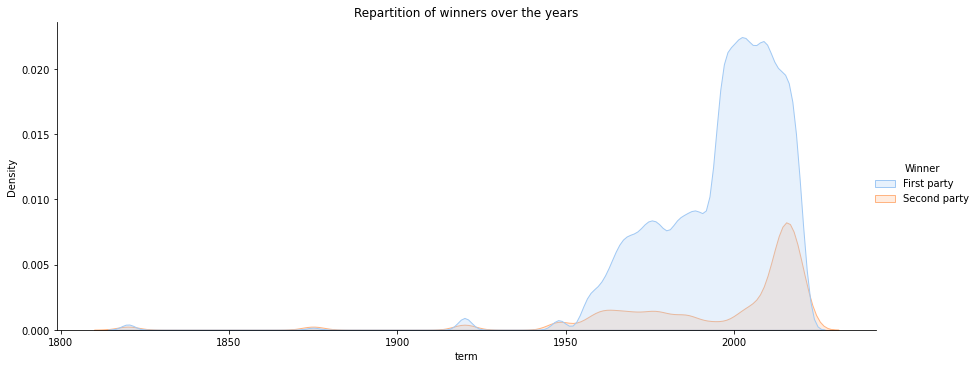

In [42]:
# Load the pastel color palette
colors = sns.color_palette('pastel')[0:2]

# Plot the unormalized "density" of the winning_index feature time-wise
g = sns.displot(df, x='term', hue='winning_index', kind='kde',
            aspect=2.5, fill=True, bw_method=0.1,palette=colors, facet_kws={'legend_out': True})
g._legend.set_title("Winner")
new_labels = ['First party', 'Second party']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("Repartition of winners over the years")
plt.show()

We can clearly notice that there is **an imbalance in our dataset** : the number of cases where the winner is the first party is way greater than for the second party.


In the majority of cases the first party (which is the *plaintiff* i.e. the party bringing the suit) will win againt the second party (the *defendant*).


Additionally one can see that before the 2000's, the first party used to always win. However, starting from the 2000's, we can see that we have more and more cases that are won by the second party. This might be due to the fact that *the laws are changing* and we are more and more capable of identifying false accusations.

Let's check the proportions of the winners among the parties.

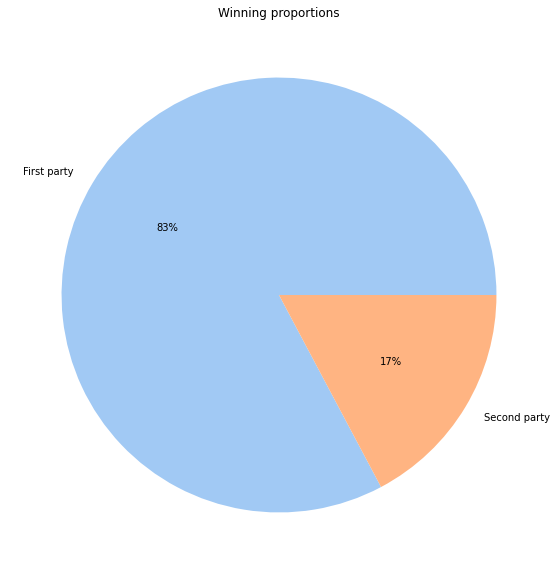

In [43]:
# Load more colors
colors = sns.color_palette('pastel')[0:5]

# Plot the proportions of winners
plt.figure(figsize=(10,10))
labels = ['First party','Second party']
plt.pie(df.groupby(['winning_index']).size(), labels=labels, colors = colors, autopct='%.0f%%')
plt.title("Winning proportions")
plt.show()

Indeed, there is a very high imbalance between the classes in our dataset. **We have to account for this imbalance when building the model, or else the model will have a tendency to favor the first party as the winning party**

## Distribution of majority and minority votes

Let's now analyze the votes in more depth

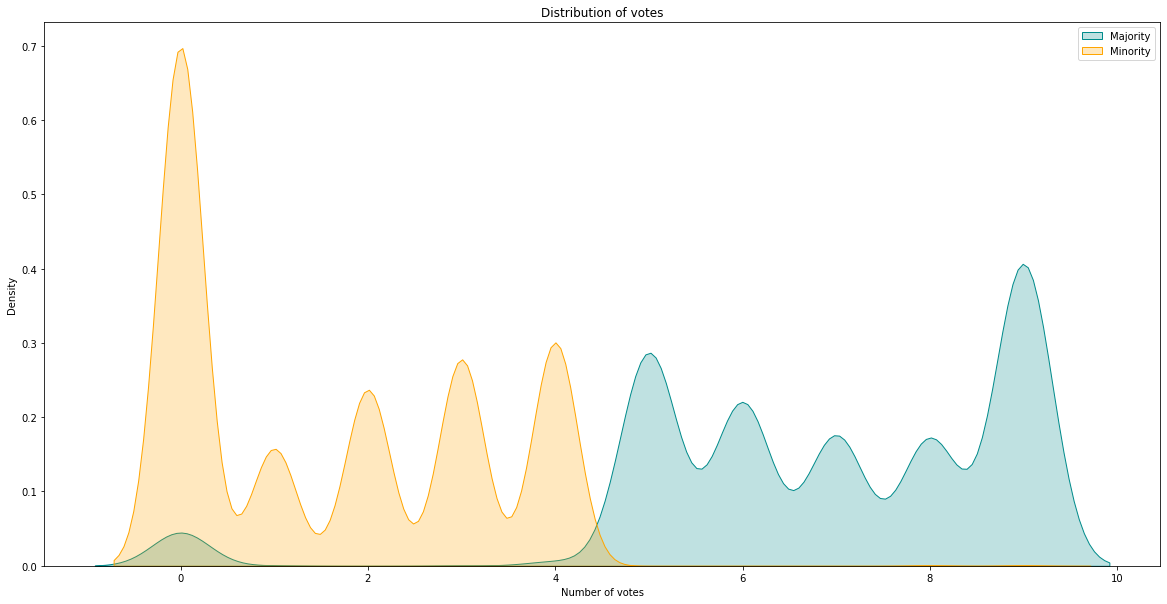

In [44]:
# Plotting both distibutions on the same figure
plt.figure(figsize=(20,10))
fig = sns.kdeplot(df['majority_vote'], shade=True, color="darkcyan",label="Majority",bw_method=0.15)
fig = sns.kdeplot(df['minority_vote'], shade=True, color="orange",label="Minority",bw_method=0.15)
plt.title("Distribution of votes")
plt.xlabel("Number of votes")
plt.legend()
plt.show()

Clearly, we can see the the majority votes are always greater than the minority ones (which is logical). However, we can notice that there is a spike of the majority votes at 0, which might seems weird.

In [45]:
# Compute the number of null majority_vote
print(f"There are {df[(df['majority_vote'] == 0)].shape[0]} with majority votes equal 0 in total")

There are 83 with majority votes equal 0 in total


Let's explore these values. For  this, we will consider 2 cases:
- Majority votes are 0, and minority votes are also 0
- Majority votes are 0 but minority votes different than 0

### Case 1 : Majority votes and minority votes both set to 0

In [46]:
# Exploring the first case
exploration_columns = ['ID', 'majority_vote', 'minority_vote', 'decision_type']
df[(df['majority_vote'] == 0) & (df['minority_vote'] == 0)][exploration_columns]

ID  majority_vote  minority_vote                      decision_type
646   54587              0              0                   dismissal - moot
845   54945              0              0                         per curiam
863   54974              0              0                         per curiam
900   55033              0              0                         per curiam
916   55052              0              0                         per curiam
...     ...            ...            ...                                ...
2172  62851              0              0                         per curiam
2176  62858              0              0                         per curiam
2278  63049              0              0                   dismissal - moot
2290  63073              0              0  dismissal - improvidently granted
2419  63403              0              0  dismissal - improvidently granted

[70 rows x 4 columns]

Notice that 70 out of 83 cases where the majority vote is equal to zero, we have also minority vote set to 0. Let's see the types of decision in this case.

In [47]:
# Compute the decision_type in case 1
print(df[(df['majority_vote'] == 0) & (df['minority_vote'] ==0 )]['decision_type'].unique())

['dismissal - moot' 'per curiam' 'dismissal - other' 'dismissal - rule 46'
 'dismissal - improvidently granted' 'equally divided' 'memorandum']


We can notice that these decision types are indeed relevant to the fact that both majority and minority votes are 0, since these types of decision don't involve voting. (see explanation of decsion types in the features explanation section above)

### Case 2 : Majority votes are 0 and minority votes different than 0

In [48]:
# Exploring the second case
exploration_columns = ['ID', 'majority_vote', 'minority_vote', 'decision_type']
df[(df['majority_vote'] == 0) & (df['minority_vote'] != 0)][exploration_columns]

ID  majority_vote  minority_vote                      decision_type
198   52147              0              8                    equally divided
772   54826              0              1                         per curiam
928   55070              0              3                         per curiam
1136  55377              0              2                         per curiam
1214  55492              0              2                         per curiam
1352  55695              0              2                         per curiam
1567  56010              0              3  dismissal - improvidently granted
1919  62166              0              9                         per curiam
2055  62617              0              1                         per curiam
2088  62676              0              2                         per curiam
2101  62709              0              2                         per curiam
2102  62712              0              2                         per curiam
2232  62971              0              2                         per curiam

In [49]:
# Checking the decision types in this second case
print("Decision types when majority vote is null and minority vote different than 0 : ")
print(df[(df['majority_vote'] == 0) & (df['minority_vote'] != 0)]['decision_type'].unique())

Decision types when majority vote is null and minority vote different than 0 : 
['equally divided' 'per curiam' 'dismissal - improvidently granted']


In [50]:
print(f"There are {df[(df['majority_vote']==0) & (df['minority_vote']!=0)].shape[0]} cases where majority votes are null and minority votes different than 0")

There are 13 cases where majority votes are null and minority votes different than 0


At first sight, it seems wrong to have minority votes larger than majority votes. However, it can occur when the decision type is `dismissal` or `per curiam`, where the decision was taken in the name of the court rather than specific judges in the case of per curiam, or if the case was dismissed.


However, for the first entry, we can see that we have 0 majority votes and 8 minority votes, with the decision type being equally divided, which is not logical. This may be **an error record from the oyez site** from which we are doing the scrapping. Maybe the record was swapped between majority and minority votes. **To avoid any confusion we will drop this specific case**

In [51]:
# Dropping the error record
df = df.drop(df[(df['majority_vote'] ==0 ) & (df['minority_vote'] != 0) & (df['decision_type'] == 'equally divided')].index)

## Repartition of the decision type

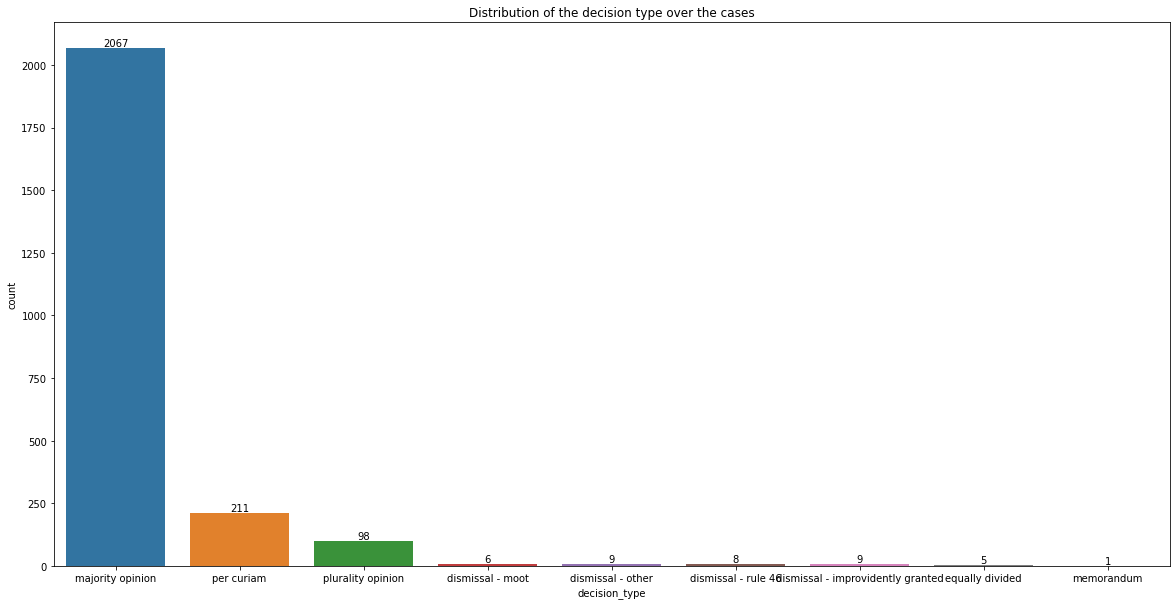

In [52]:
# Plot the distribution of the decision types
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['decision_type'], x='decision_type',ax=ax)
rects = ax.patches
labels = df['decision_type'].value_counts(sort=False).values
# Change color depending on the decision
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
plt.title("Distribution of the decision type over the cases")
plt.show()

We can notice that most of the cases are taken based on a **majority opinion**. One should indeed take account of this imbalance in predicting the decision type.


Also, since the dismissal decision has several sub-categories (moot, rule 46, improvidently granted,..) and the occurences of these categories are relatively rare, one might think about grouping them in one type called "dismissal" to not complicate the problem.

## Repartition of the disposition type

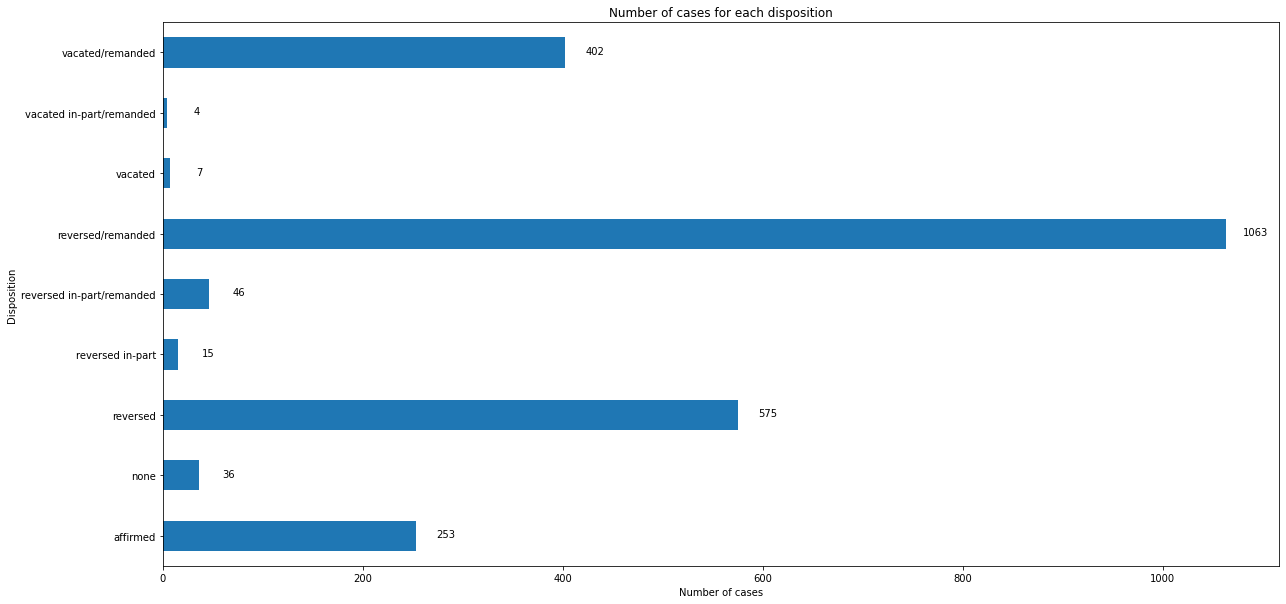

In [53]:
# Plot the distribution of the disposition types
ax = df.groupby(['disposition']).size().plot(kind='barh', figsize=(20,10))
for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:}'.format(width),
             ha='center', va='center')
plt.title("Number of cases for each disposition")
plt.xlabel("Number of cases")
plt.ylabel("Disposition")
plt.show()

We can notice from the bar plot above that there are 36 *none* disposition values. Let's try to explore where these *none* values are coming from.

In [54]:
# Exxtracting the none dispositions
exploration_columns = ['name','majority_vote', 'minority_vote', 'decision_type', 'disposition', 'winning_party']
df.loc[df['disposition'] == 'none'][exploration_columns]

name  majority_vote  \
646   Caterpillar, Inc. v. International Union, Unit...              0   
772                                   Dempsey v. Martin              0   
938                Medical Board of California v. Hason              0   
1154  BCI Coca-Cola Bottling Company of Los Angeles ...              0   
1167            Altadis USA, Inc. v. Sea Star Line, LLC              0   
1197                                       Ali v. Achim              0   
1210  Klein & Co. Futures, Inc. v. Board of Trade of...              9   
1247                                Al-Marri v. Spagone              0   
1312               Health Care Service Corp. v. Pollitt              0   
1372          Stok & Associates, P.A. v. Citibank, N.A.              0   
1462                                Magner v. Gallagher              0   
1559                                   Madigan v. Levin              0   
1567                    Unite Here Local 355 v. Mulhall              0   
1570  Cline v. Oklahoma Coalition for Reproductive J...              0   
1572  Mount Holly v. Mt. Holly Gardens Citizens in A...              0   
1596        Chen v. Mayor and City Council of Baltimore              0   
1626  Public Employees' Retirement System v. IndyMac...              0   
1661                                  Toca v. Louisiana              0   
1909  Moore v. Charlotte-Mecklenburg Board of Education              0   
1939                            South Carolina v. Baker              7   
1957                                 Kansas v. Colorado              8   
1982                                 Marbury v. Madison              4   
2034          Brown v. Board of Education of Topeka (1)              9   
2037  MHN Government Services, Inc., and Managed Hea...              0   
2040                                   Duncan v. Owens               0   
2041                          Wittman v. Personhuballah              8   
2071                                 Berger v. New York              6   
2107  UBS Financial Services v. Union de Empleados d...              0   
2113                              Jennings v. Rodriguez              3   
2188                       City of Hays, Kansas v. Vogt              8   
2190                          Dalmazzi v. United States              9   
2227                                 Montana v. Wyoming              8   
2302        Virginia House of Delegates v. Bethune-Hill              5   
2395        Roman Catholic Diocese of Brooklyn v. Cuomo              5   
2413                                 Florida v. Georgia              9   
2419                             United States v. Texas              0   

      minority_vote                      decision_type disposition  \
646               0                   dismissal - moot        none   
772               1                         per curiam        none   
938               0                   dismissal - moot        none   
1154              0                  dismissal - other        none   
1167              0                dismissal - rule 46        none   
1197              0                dismissal - rule 46        none   
1210              0                dismissal - rule 46        none   
1247              0                   dismissal - moot        none   
1312              0                dismissal - rule 46        none   
1372              0                dismissal - rule 46        none   
1462              0                dismissal - rule 46        none   
1559              0                  dismissal - other        none   
1567              3  dismissal - improvidently granted        none   
1570              0  dismissal - improvidently granted        none   
1572              0                  dismissal - other        none   
1596              0                  dismissal - other        none   
1626              0  dismissal - improvidently granted        none   
1661              0                dismissal - rule 

There are many points to be highlighted here:
- There is an `N/A` value that hasn't been dropped yet, and this is because it's written as a string. In the next cell, we check if there are other similar cases, and we will drop them.
- There are a lot of cases that have been dismissed even though they had a high majority vote (8 or 9). There's no clear explanation for this. One can't conclude on if it's an error or a real case disposition. A little bit of research on these specific cases can be helpful. Since our objective is to create an academic ML challenge, we'll leave this task for the competitors to see how they will deal with these cases (drop, impute, or investigate more...)
- In the case of dismissal with no majority and minority votes, the *none* values should be taken into consideration when building the model (these *none* values carry significance).

In [55]:
# Isolate cases containing 'N/A'
na_prob = df.loc[df['winning_party'] == 'N/A'][exploration_columns]
print(f"Number of cases to drop with a string N/A: {na_prob.shape[0]}")
na_prob

Number of cases to drop with a string N/A: 1


name  majority_vote  minority_vote      decision_type  \
1559  Madigan v. Levin              0              0  dismissal - other   

     disposition winning_party  
1559        none           N/A

In [56]:
# Dropping these cases
df = df.drop(df[df['winning_party'] == 'N/A'].index)

## Repartition of the cases over the states

First off, we need to verify how much each state is represented in the dataset, in order to make sure that the laws across the states will be learned in an equitable model.

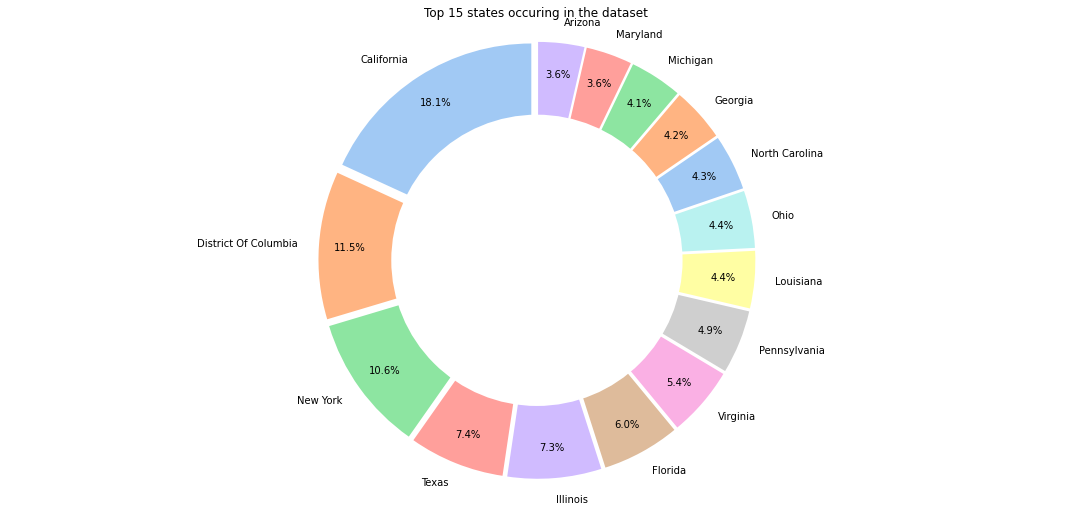

In [57]:
# Focus on the top 15 states
k = 15
ax = df.groupby(['province_name']).size().sort_values(ascending=False)[:k]
labels = ax.index
explode = tuple([0.05]*ax.shape[0])
colors = sns.color_palette('pastel')
plt.pie(ax, colors = colors, labels=labels, 
        autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)

# Draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches((15,7))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Top 15 states occuring in the dataset')
plt.show()

For this we will visualize the top $k$ states present in the dataset interactively.

In [58]:
def plot_pie(k=10):
    ax = df.groupby(['province_name']).size().sort_values(ascending=False)[:k]
    labels = ax.index
    explode = tuple([0.05]*ax.shape[0])
    colors = sns.color_palette('pastel')

    plt.pie(ax, colors = colors, labels=labels, 
            autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)

    # Draw a circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches((15,7))

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')  
    plt.tight_layout()
    plt.title('Top 15 states occuring in the dataset')
    plt.show()

In [59]:
interact(plot_pie, k=(1,df.groupby(['province_name']).size().shape[0] , 1))
plt.show()

interactive(children=(IntSlider(value=10, description='k', max=55, min=1), Output()), _dom_classes=('widget-in…

By interacting with this visualization, we can notice that there are a lot of states that are very under represented, relative to some big states like California, district of Columbia or New york. One should make sure that the model is not biased towards the laws of one state (ethical conundrum), since the laws change form state to another.

# Feature engineering

The goal of this section is to engineer new features in order to highlight some key aspects of the dataset.

## Classify party names

We observed that their was almost as many different party names as there are entries in this dataset. Based on this observation, we decided to craft a new feature which will sort this diversity of names. We'll call them `first_party_type` and `second_party_type` and will evaluate to `State` if the party is a public institution, to `Company` if the party is a company and to `N/A` if it's anything else. Let's first write down those rules as functions.

In [60]:
# Classify a party in three types : 'State', 'Company' or 'N/A'

# All the following cases are considered as 'State':
# state_name
# contains state_name + " State"
# contains state_name + " Dep"
# 'United States'
# contains 'United States of America'
# contains 'State of '
# contains 'City of '
# contains 'Commonwealth of '
# variants with + ', et al.' or ' et al.'
# contains 'Commission'


usa_states = set(df['province_name'].dropna())
usa_states_extended = set([x + ' Dep' for x in usa_states] +
                          [x + ' State' for x in usa_states] + 
                          [x + ', et al.' for x in usa_states] +
                          [x + ' et al.' for x in usa_states])

def is_state(party_name):
  return ((party_name in usa_states) or
      any([x in party_name for x in usa_states_extended]) or
      (party_name == 'United States') or
      (party_name == 'United States, et al.') or
      (party_name == 'United States et al.') or
      ('United States of America' in party_name) or
      ('State of ' in party_name) or
      ('City of ' in party_name) or
      ('Commonwealth of ' in party_name) or
      ('Commission' in party_name))

# All of the following are considered as 'Company'
# contains 'Corporation'
# contains 'Company'
# contains 'ndustr' (eg.'Industry', 'Industries', ...)
# contains 'Inc.' or 'LLC' or 'Ltd'

def is_company(party_name):
  return (('Corporation' in party_name) or
          ('Company' in party_name) or
          ('ndustr' in party_name) or
          ('Inc.' in party_name) or
          ('LLC' in party_name) or
          ('Ltd' in party_name))

def classifier(party_name):
  if is_state(party_name): return "State"
  elif is_company(party_name): return "Company"
  else: return "N/A"

Now we apply these rules on the `first_party` and `second_party` features.

In [61]:
# Create the new columns
df = df.assign(first_party_type=df['first_party'].apply(classifier))
df = df.assign(second_party_type=df['second_party'].apply(classifier))

Let's plot the distribution of those new features

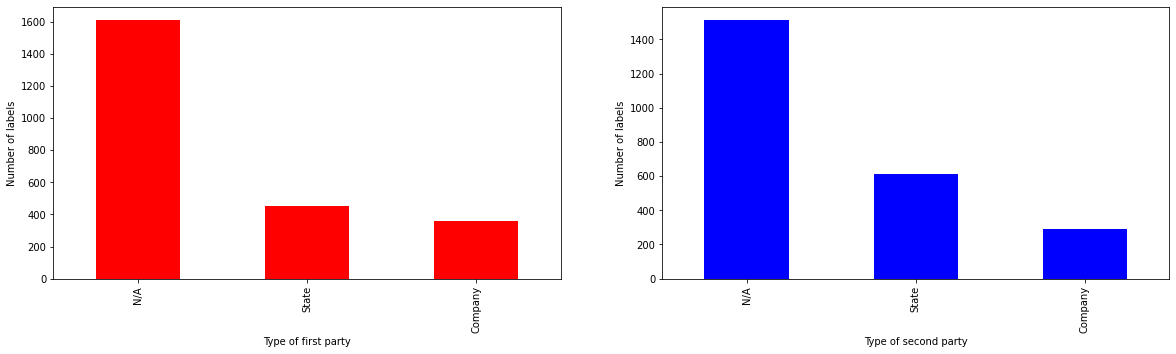

In [62]:
# Plot the distribution of labels
plt.figure(figsize=(20,5), facecolor='white')
plt.subplot(1,2,1)
df['first_party_type'].value_counts().plot(kind='bar', color="red")
plt.xlabel("Type of first party")
plt.ylabel("Number of labels")
plt.subplot(1,2,2)
df['second_party_type'].value_counts().plot(kind='bar', color="blue")
plt.xlabel("Type of second party")
plt.ylabel("Number of labels")
plt.show()

We satisfyingly see that our new features were able to populate about half of the dataset.

## Plot location

Now we are interessted in the location features. We've previously seen how they were distributed along the dataset but we have visualized their link to `winning_index`. 
<br>What if the decision taken in the trial is biased by the geographical location where it was taken? (e.g. political bias, etc)
<br>Let's first keep only a few features of interest.

In [63]:
# Build the location dataframe
df_location = df[['latitude','longitude','province','province_name']]
df_location = df_location.assign(first_wins=df['winning_index'] == 1)
df_location = df_location.assign(second_wins=1 - df_location['first_wins'])

Let's make a dataframe grouped by the coordinates (`latitude`,`longitude`) with the relevants statistics. We have to get rid of some outlier data to get a nice visualisation.

In [64]:
# Build a dataframe with longitude / latitude

# Extract the dataset
df_location_coordinate = df_location[['latitude','longitude','first_wins','second_wins']]
df_location_coordinate = df_location_coordinate.dropna()
# Group by coordinates
df_location_coordinate = df_location_coordinate.groupby(['latitude','longitude']).sum()
# Reset the multi-index
df_location_coordinate = df_location_coordinate.reset_index()
# Compute the colors
df_location_coordinate = df_location_coordinate.assign(color='red')
df_location_coordinate.loc[df_location_coordinate['first_wins'] > df_location_coordinate['second_wins'], 'color'] = 'blue'
# Remove locations outside of the mainland
df_location_coordinate = df_location_coordinate[(df_location_coordinate["longitude"] < -50) &
                          (df_location_coordinate["longitude"] > -130) &
                          (df_location_coordinate["latitude"] < 55) &
                          (df_location_coordinate["latitude"] > 20)].dropna()

In [65]:
df_location_coordinate

latitude   longitude  first_wins  second_wins color
16    20.021165  -75.113672           2            0  blue
17    21.319399  -74.652100           1            0  blue
21    21.620459  -78.852817           1            0  blue
22    23.120154  -82.359741           1            0  blue
23    25.774602  -80.195146           1            0  blue
...         ...         ...         ...          ...   ...
1217  47.688215 -122.290538           1            0  blue
1218  47.706434 -122.350057           0            1   red
1219  48.056335 -122.728093           1            0  blue
1220  48.503211 -122.679493           1            0  blue
1221  48.533090 -108.783639           1            0  blue

[1194 rows x 5 columns]

Let's make another dataframe with the larger scale of states (called `province` in the dataset). We also have to get rid of some outlier data (Alaska, Hawaii and Puerto Rico) to get a nice visualisation.

In [66]:
# Build a dataframe with province

# Extract the dataset
df_location_province = df_location[['province','province_name','first_wins','second_wins']]
df_location_province = df_location_province.dropna()
# Group by province
df_location_province = df_location_province.groupby(['province','province_name']).sum()
# Reset the multi-index
df_location_province = df_location_province.reset_index()
# Compute the colors
total = df_location_province['first_wins'] + df_location_province['second_wins']
perc_first = df_location_province['first_wins'] / total
perc_second = df_location_province['second_wins'] / total
color_red = np.array(mpl.colors.to_rgb('red'))
color_blue = np.array(mpl.colors.to_rgb('blue'))
state_color = np.apply_along_axis(mpl.colors.to_hex, 1, np.outer(perc_first, color_blue) + np.outer(perc_second, color_red))
df_location_province = df_location_province.assign(color=state_color)
# Get rid of some provinces
df_location_province = df_location_province[~df_location_province['province_name'].isin(["Alaska", "Hawaii", "Puerto Rico"])]

In [67]:
df_location_province

province             province_name  first_wins  second_wins    color
1        AL                   Alabama          18            8  #4e00b1
2        AR                  Arkansas           8            2  #3300cc
3        AZ                   Arizona          21            8  #4600b9
4        CA                California         111           36  #3e00c1
5        CO                  Colorado          11            4  #4400bb
6        CT               Connecticut           7            9  #8f0070
7        DC      District Of Columbia          75           18  #3100ce
8        DE                  Delaware           5            0  #0000ff
9        FL                   Florida          36           13  #4400bb
10       GA                   Georgia          28            6  #2d00d2
11       GU                      Guam           1            0  #0000ff
13       IA                      Iowa          12            1  #1400eb
14       ID                     Idaho           6            0  #0000ff
15       IL                  Illinois          49           10  #2b00d4
16       IN                   Indiana          11            2  #2700d8
17       KS                    Kansas           4            4  #800080
18       KY                  Kentucky          15            1  #1000ef
19       LA                 Louisiana          30            6  #2a00d4
20       MA             Massachusetts          20            7  #4200bd
21       MD                  Maryland          23            6  #3500ca
22       ME                     Maine           3            1  #4000bf
23       MI                  Michigan          25            8  #3e00c1
24       MN                 Minnesota          15            1  #1000ef
25       MO                  Missouri          16            4  #3300cc
26       MP  Northern Mariana Islands           1            0  #0000ff
27       MS               Mississippi           9            3  #4000bf
28       MT                   Montana           7            1  #2000df
29       NC            North Carolina          24           11  #5000af
30       ND              North Dakota           1            1  #800080
31       NE                  Nebraska           8            1  #1c00e3
32       NH             New Hampshire           2            1  #5500aa
33       NJ                New Jersey          11            2  #2700d8
34       NM                New Mexico           5            1  #2a00d4
35       NV                    Nevada           7            2  #3900c6
36       NY                  New York          70           16  #2f00d0
37       OH                      Ohio          31            5  #2300dc
38       OK                  Oklahoma          12            6  #5500aa
39       ON                   Ontario           1            0  #0000ff
40       OR                    Oregon          14            4  #3900c6
41       PA              Pennsylvania          35            5  #2000df
43       RI              Rhode Island           5            2  #4900b6
44       SC            South Carolina           6            5  #74008b
45       SD              South Dakota           3            1  #4000bf
46       TN                 Tennessee          13            5  #4700b8
47       TX                     Texas          47           13  #3700c8
48       UT                      Utah           5            1  #2a00d4
49       VA                  Virginia          34           10  #3a00c5
50       VT                   Vermont           1            1  #800080
51       WA                Washington          13            7  #5900a6
52       WI                 Wisconsin           9            7  #70008f
53       WV             West Virginia           8            2  #3300cc
54       WY                   Wyoming           1            0  #0000ff

Let's now plot the coordinates

In [68]:
# Download the map of the USA
!wget https://github.com/kjhealy/us-county/raw/master/data/geojson/gz_2010_us_040_00_500k.json

--2022-03-12 09:26:39--  https://github.com/kjhealy/us-county/raw/master/data/geojson/gz_2010_us_040_00_500k.json
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kjhealy/us-county/master/data/geojson/gz_2010_us_040_00_500k.json [following]
--2022-03-12 09:26:40--  https://raw.githubusercontent.com/kjhealy/us-county/master/data/geojson/gz_2010_us_040_00_500k.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490848 (2.4M) [text/plain]
Saving to: ‘gz_2010_us_040_00_500k.json’

gz_2010_us_040_00_5 100%[===================>]   2.38M  --.-KB/s    in 0.04s   

2022-03-12 09:26:41 (58.3 MB/s) - ‘gz_

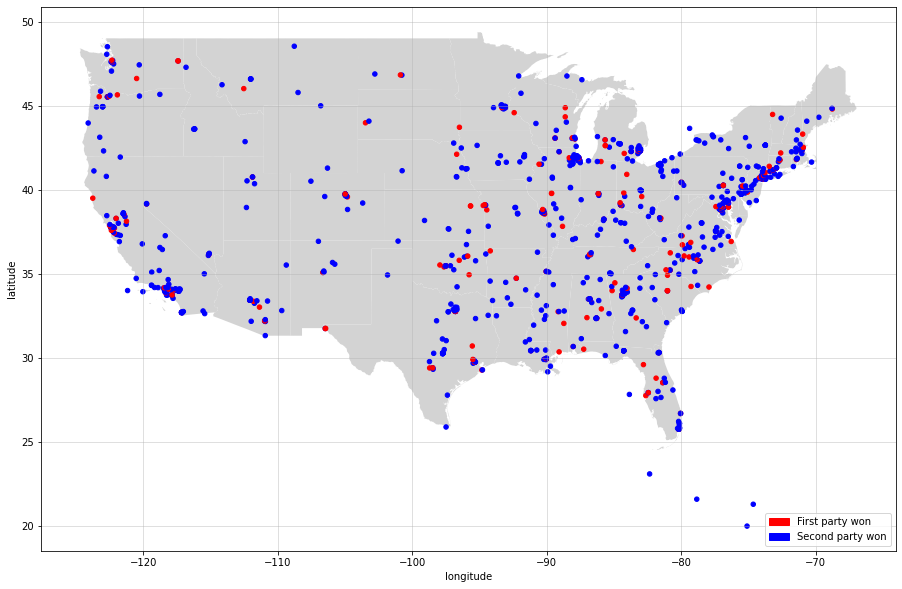

In [69]:
# Plot all the coordinates
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
states = gpd.read_file('gz_2010_us_040_00_500k.json')
states = states[~states['NAME'].isin(["Alaska", "Hawaii", "Puerto Rico"])]
states.plot(color="lightgrey", ax=ax)
df_location_coordinate.plot(x="longitude", y="latitude", kind="scatter", color=df_location_coordinate['color'], ax=ax)
ax.grid(b=True, alpha=0.5)
red_patch = mpatches.Patch(color='red', label='First party won')
blue_patch = mpatches.Patch(color='blue', label='Second party won')
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.show()

On this map, we can again see the unbalanced data where there are much more blue dots than red dots. We can also see that they are more focused on the coasts rather than in the middle of the country. However, we cannot really see a pattern of distribution by considering the mere location. Let's plot them state-wise.

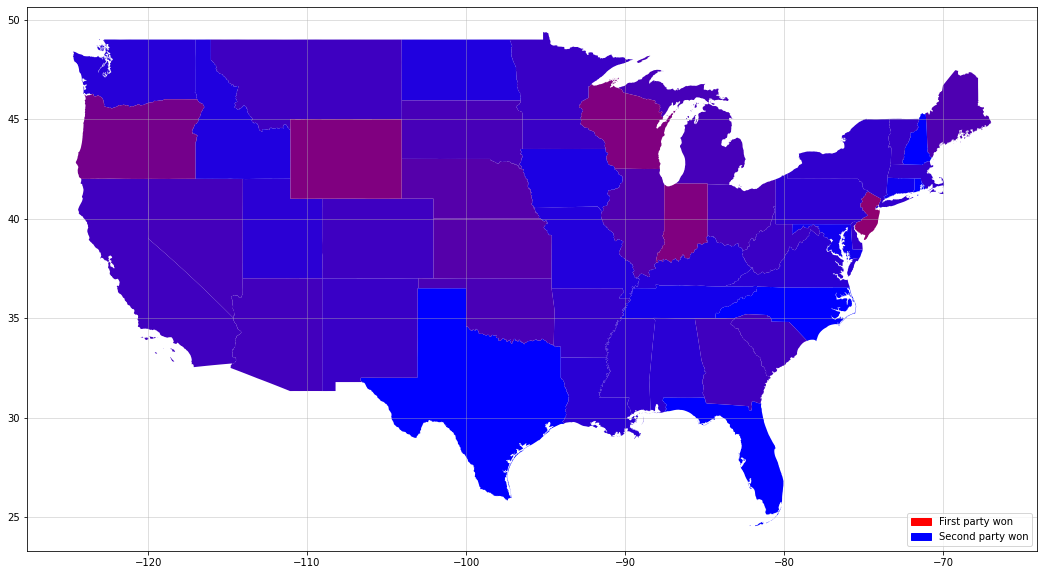

In [70]:
# Plot the map with states
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')
states[states['NAME'].isin(df_location_province['province_name'])].plot(color=df_location_province['color'], ax=ax)
ax.grid(b=True, alpha=0.5)
red_patch = mpatches.Patch(color='red', label='First party won')
blue_patch = mpatches.Patch(color='blue', label='Second party won')
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.show()

Here the story is much more interesting: we can clearly see that some states are definitely blue and others are in between. We can conclude that the feature `province_name` might be interesting to use in the model.

## Process `heard_by` and `decided_by`

Let's focus on the three features `heard_by`, `decided_by` and `advocates` : they all describe (in big JSON files) people who attended the trial. We'll only keep `heard_by` and `decided_by` as they depict about 100 people each whereas there seems to be as much advocates as there are cases. We start by extracting the meaningful names from the inner JSONs files.

In [71]:
# Functions to extract the deciders and the hearers

hearers_names, hearers_thumbnails = set(), {}
deciders_names, deciders_thumbnails = set(), {}

def get_hearer_names(x):
  if x is None or x[0] is None:
    return []
  else:
    ret = []
    for y in x[0]['members']:
      # Get the name with IDs
      name = '{} (#{})'.format(y['name'], y['ID'])
      # Append to the maps
      hearers_names.add(name)
      if 'thumbnail' in y:
        hearers_thumbnails[name] = y['thumbnail']['href']
      # Remenber the result
      ret.append(name)
    return ret

def get_decider_names(x):
  if x is None:
    return []
  else:
    ret = []
    for y in x['members']:
      # Get the name with IDs
      name = '{} (#{})'.format(y['name'], y['ID'])
      # Append to maps
      deciders_names.add(name)
      if 'thumbnail' in y:
        deciders_thumbnails[name] = y['thumbnail']['href']
      # Remenber the result
      ret.append(name)
    return ret

Now we create the features : `df_hearers` and `df_deciders` have the same number of rows as `df` and each entry is a list of people (with their name and ID).

In [72]:
# Identify hearers and deciders
df_hearers = df['heard_by'].apply(get_hearer_names)
df_deciders = df['decided_by'].apply(get_decider_names)

In order to visualize this feature and its potential, we make two separate dataframes with our data about those people and we link them with our goal of predicting the `winning_index`

In [73]:
# Make new tables for statistics about the hearers and the deciders

def make_stats_df(names, thumbnails, main_df, list_df):

  def worker_stats(name):
    # Extract the statitics from the main dataframe
    df_tmp = main_df[list_df.apply(lambda x : name in x)]['winning_index'].value_counts()
    # Compute the numbers
    if 1 in df_tmp:
      first_party_win = df_tmp[1]
    else:
      first_party_win = 0
    if 2 in df_tmp:
      second_party_win = df_tmp[2]
    else:
      second_party_win = 0
    # Compute the percentage
    total = first_party_win + second_party_win
    first_party_win_rate, second_party_win_rate = first_party_win / total, second_party_win / total
    return first_party_win, first_party_win_rate, second_party_win, second_party_win_rate

  # Create the daframe
  df_stats = pd.DataFrame(names)
  df_stats.columns = ['name']
  # Extract the thumbnails
  df_stats.loc[:,'thumbnail'] = df_stats['name'].apply(lambda x : thumbnails.get(x,''))
  # Extract the statistics from the main dataframe
  df_stats['first_party_win'], df_stats['first_party_win_rate'], df_stats['second_party_win'], df_stats['second_party_win_rate'] = zip(*df_stats['name'].map(worker_stats))
  return df_stats

# Build the stat dataframes
hearers = make_stats_df(hearers_names, hearers_thumbnails, df, df_hearers)
deciders = make_stats_df(deciders_names, deciders_thumbnails, df, df_deciders)

In [74]:
hearers

name  \
0                Joseph McKenna (#15098)   
1         Oliver W. Holmes, Jr. (#15048)   
2          William H. Rehnquist (#15141)   
3               David J. Brewer (#15114)   
4               Nathan Clifford (#15072)   
..                                   ...   
95               Roger B. Taney (#15054)   
96  Henry Brockholst Livingston (#15111)   
97               Gabriel Duvall (#15147)   
98                 Neil Gorsuch (#62836)   
99                  David Davis (#15124)   

                                            thumbnail  first_party_win  \
0   https://api.oyez.org/sites/default/files/image...                3   
1   https://api.oyez.org/sites/default/files/image...                5   
2   https://api.oyez.org/sites/default/files/image...              949   
3   https://api.oyez.org/sites/default/files/image...                1   
4   https://api.oyez.org/sites/default/files/image...                1   
..                                                ...              ...   
95  https://api.oyez.org/sites/default/files/image...                1   
96  https://api.oyez.org/sites/default/files/image...                3   
97  https://api.oyez.org/sites/default/files/image...                3   
98  https://api.oyez.org/sites/default/files/filef...              168   
99  https://api.oyez.org/sites/default/files/image...                1   

    first_party_win_rate  second_party_win  second_party_win_rate  
0               0.428571                 4               0.571429  
1               0.500000                 5               0.500000  
2               0.923152                79               0.076848  
3               0.250000                 3               0.750000  
4               0.250000                 3               0.750000  
..                   ...               ...                    ...  
95              1.000000                 0               0.000000  
96              0.600000                 2               0.400000  
97              0.428571                 4               0.571429  
98              0.664032                85               0.335968  
99              0.333333                 2               0.666667  

[100 rows x 6 columns]

In [75]:
# Display the statistics

def display_statistics(df_stats):
  count = 1
  # Setup the requests seesion
  session = requests_cache.CachedSession('demo_cache')
  # Prepare the plot
  plt.figure(figsize=(40,35), facecolor='white')
  # Count the number of faces to display
  s = int(np.ceil(np.sqrt((df_stats['thumbnail'] != '').sum())))
  for index, row in df_stats.iterrows():
    # Skip missing thumbnails
    if not len(row['thumbnail']) > 0: continue
    # Download image
    response = session.get(row['thumbnail'])
    # Process image
    img = Image.open(BytesIO(response.content))
    # Show image
    plt.subplot(s, s, count)
    plt.imshow(img)
    plt.axis('off')
    plt.title(row['name'])
    # Make the legend
    red_patch = mpatches.Patch(color='red', label='First party {} ({}%)'.format(row['first_party_win'], round(100 * row['first_party_win_rate'], 1)))
    blue_patch = mpatches.Patch(color='blue', label='Second party {} ({}%)'.format(row['second_party_win'], round(100 * row['second_party_win_rate'], 1)))
    plt.legend(handles=[red_patch, blue_patch], loc='lower center')
    # Increment
    count += 1
  plt.show()

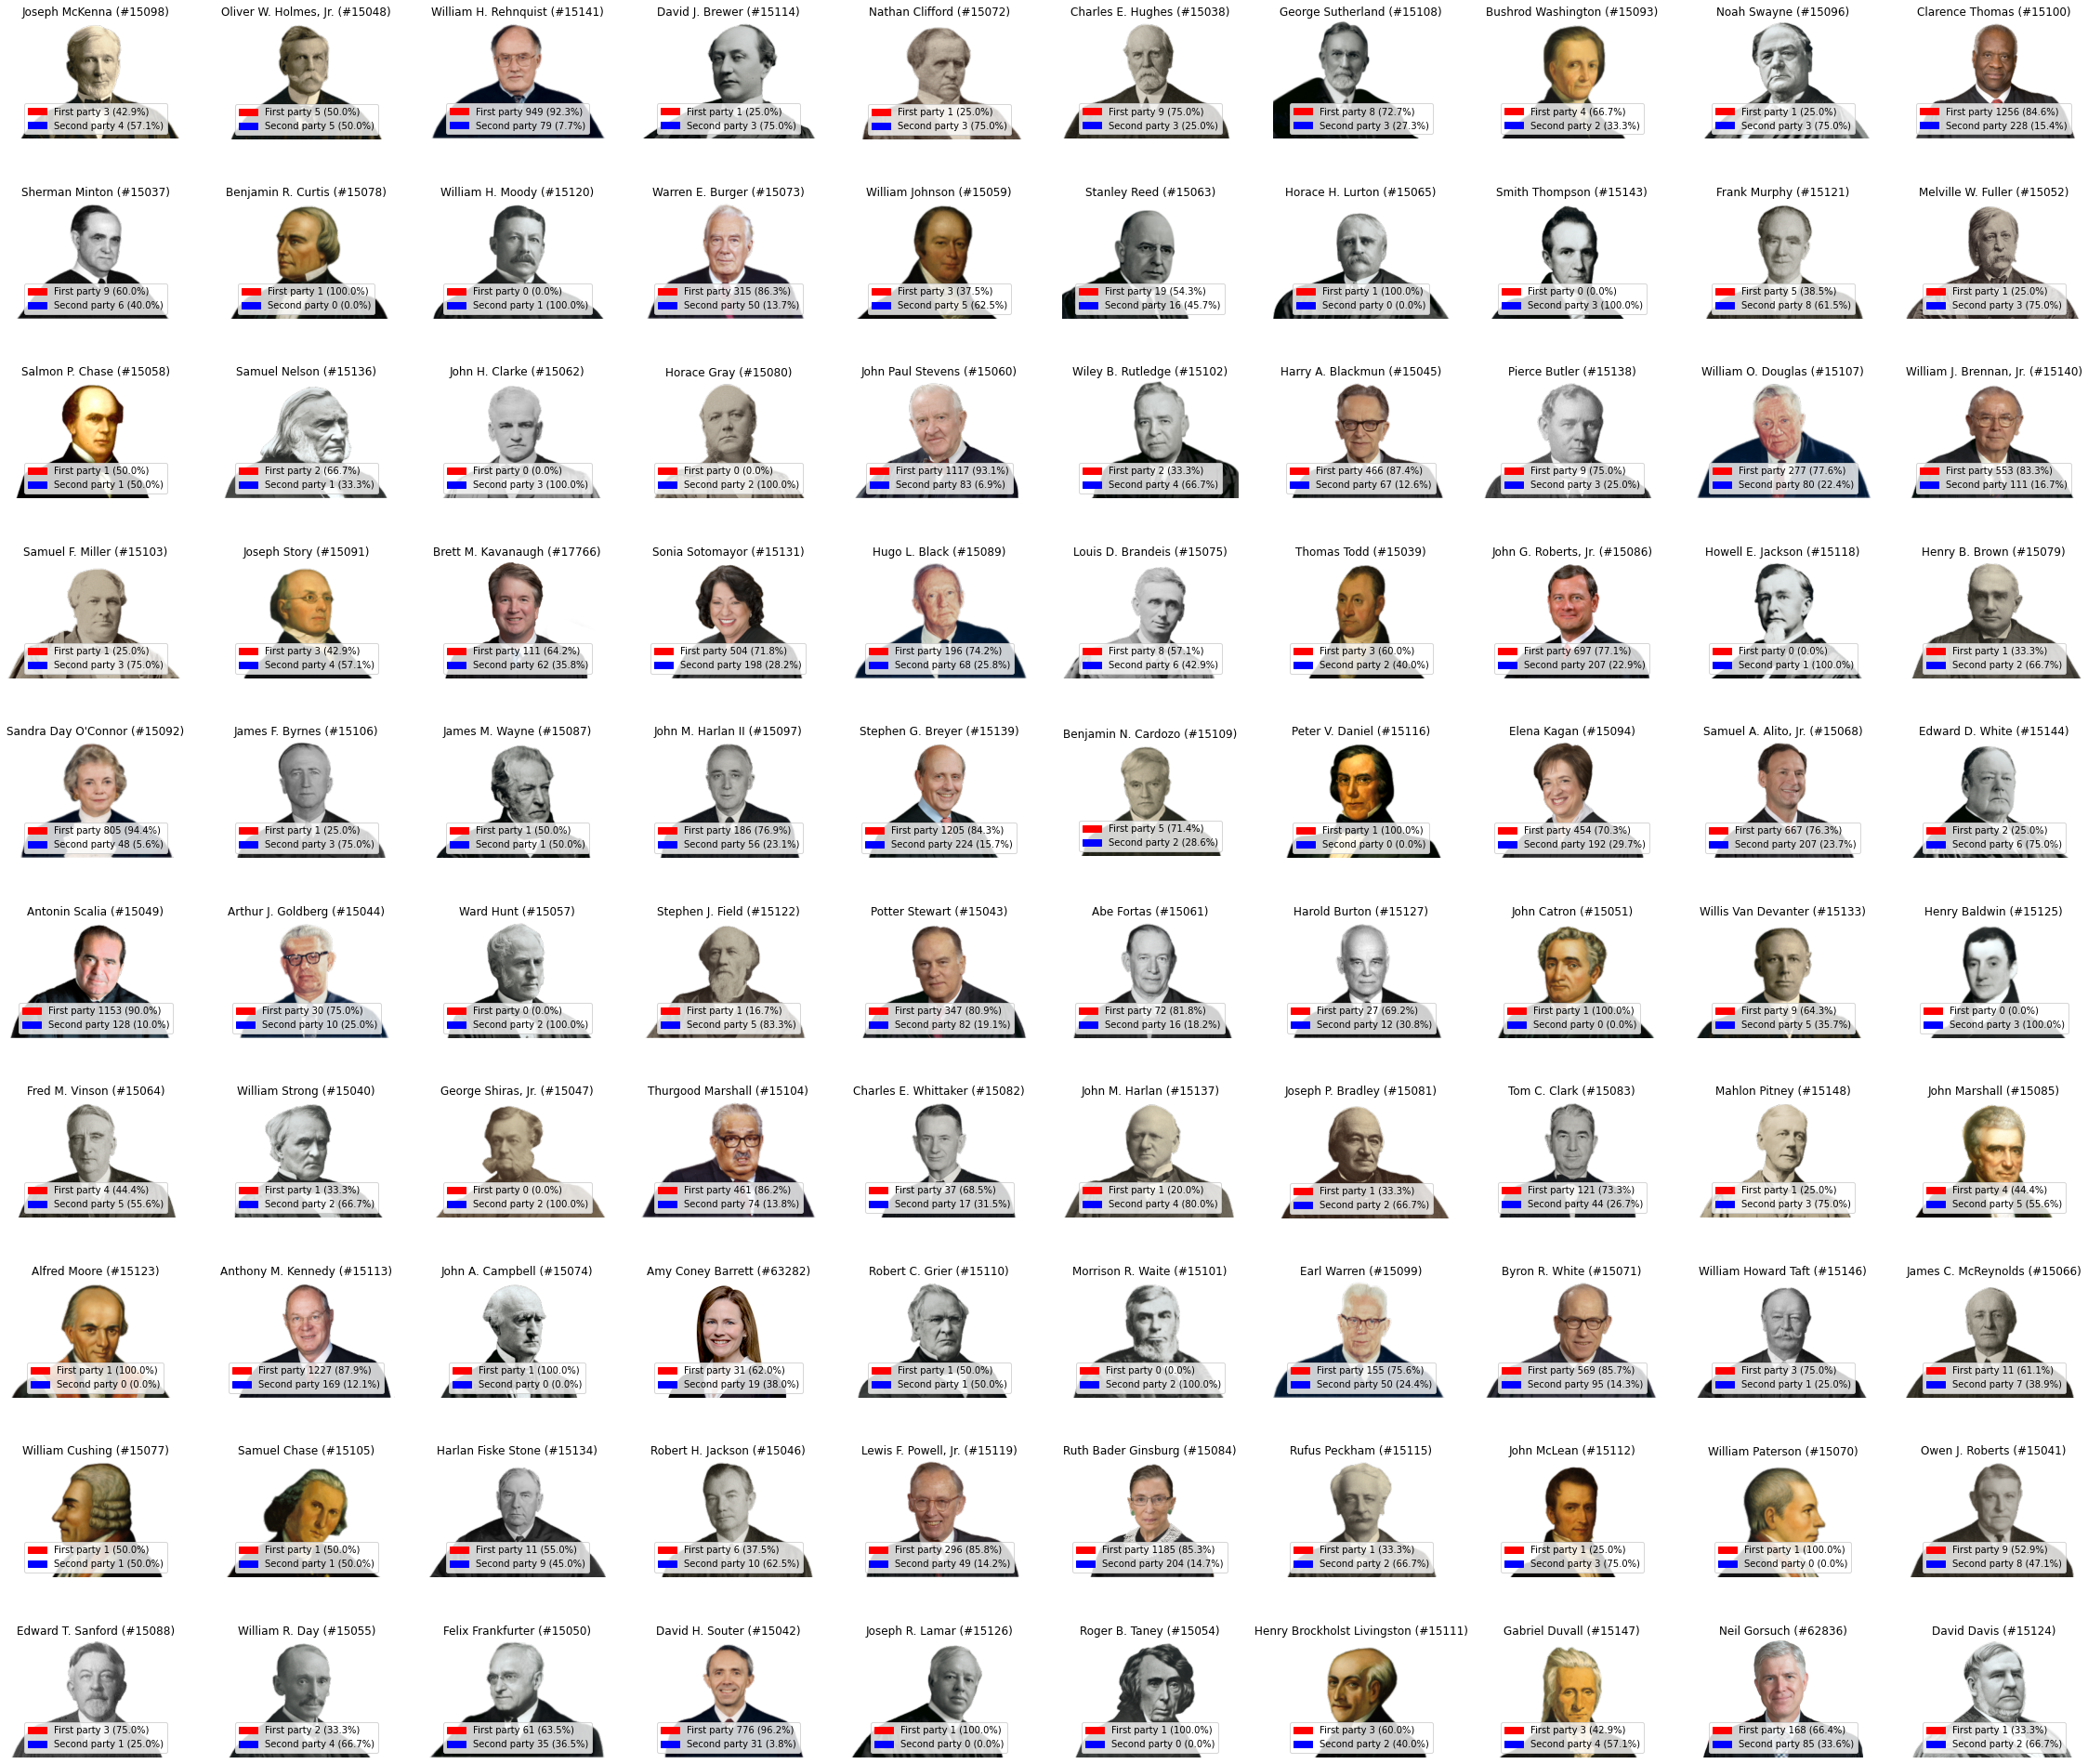

In [76]:
display_statistics(hearers)

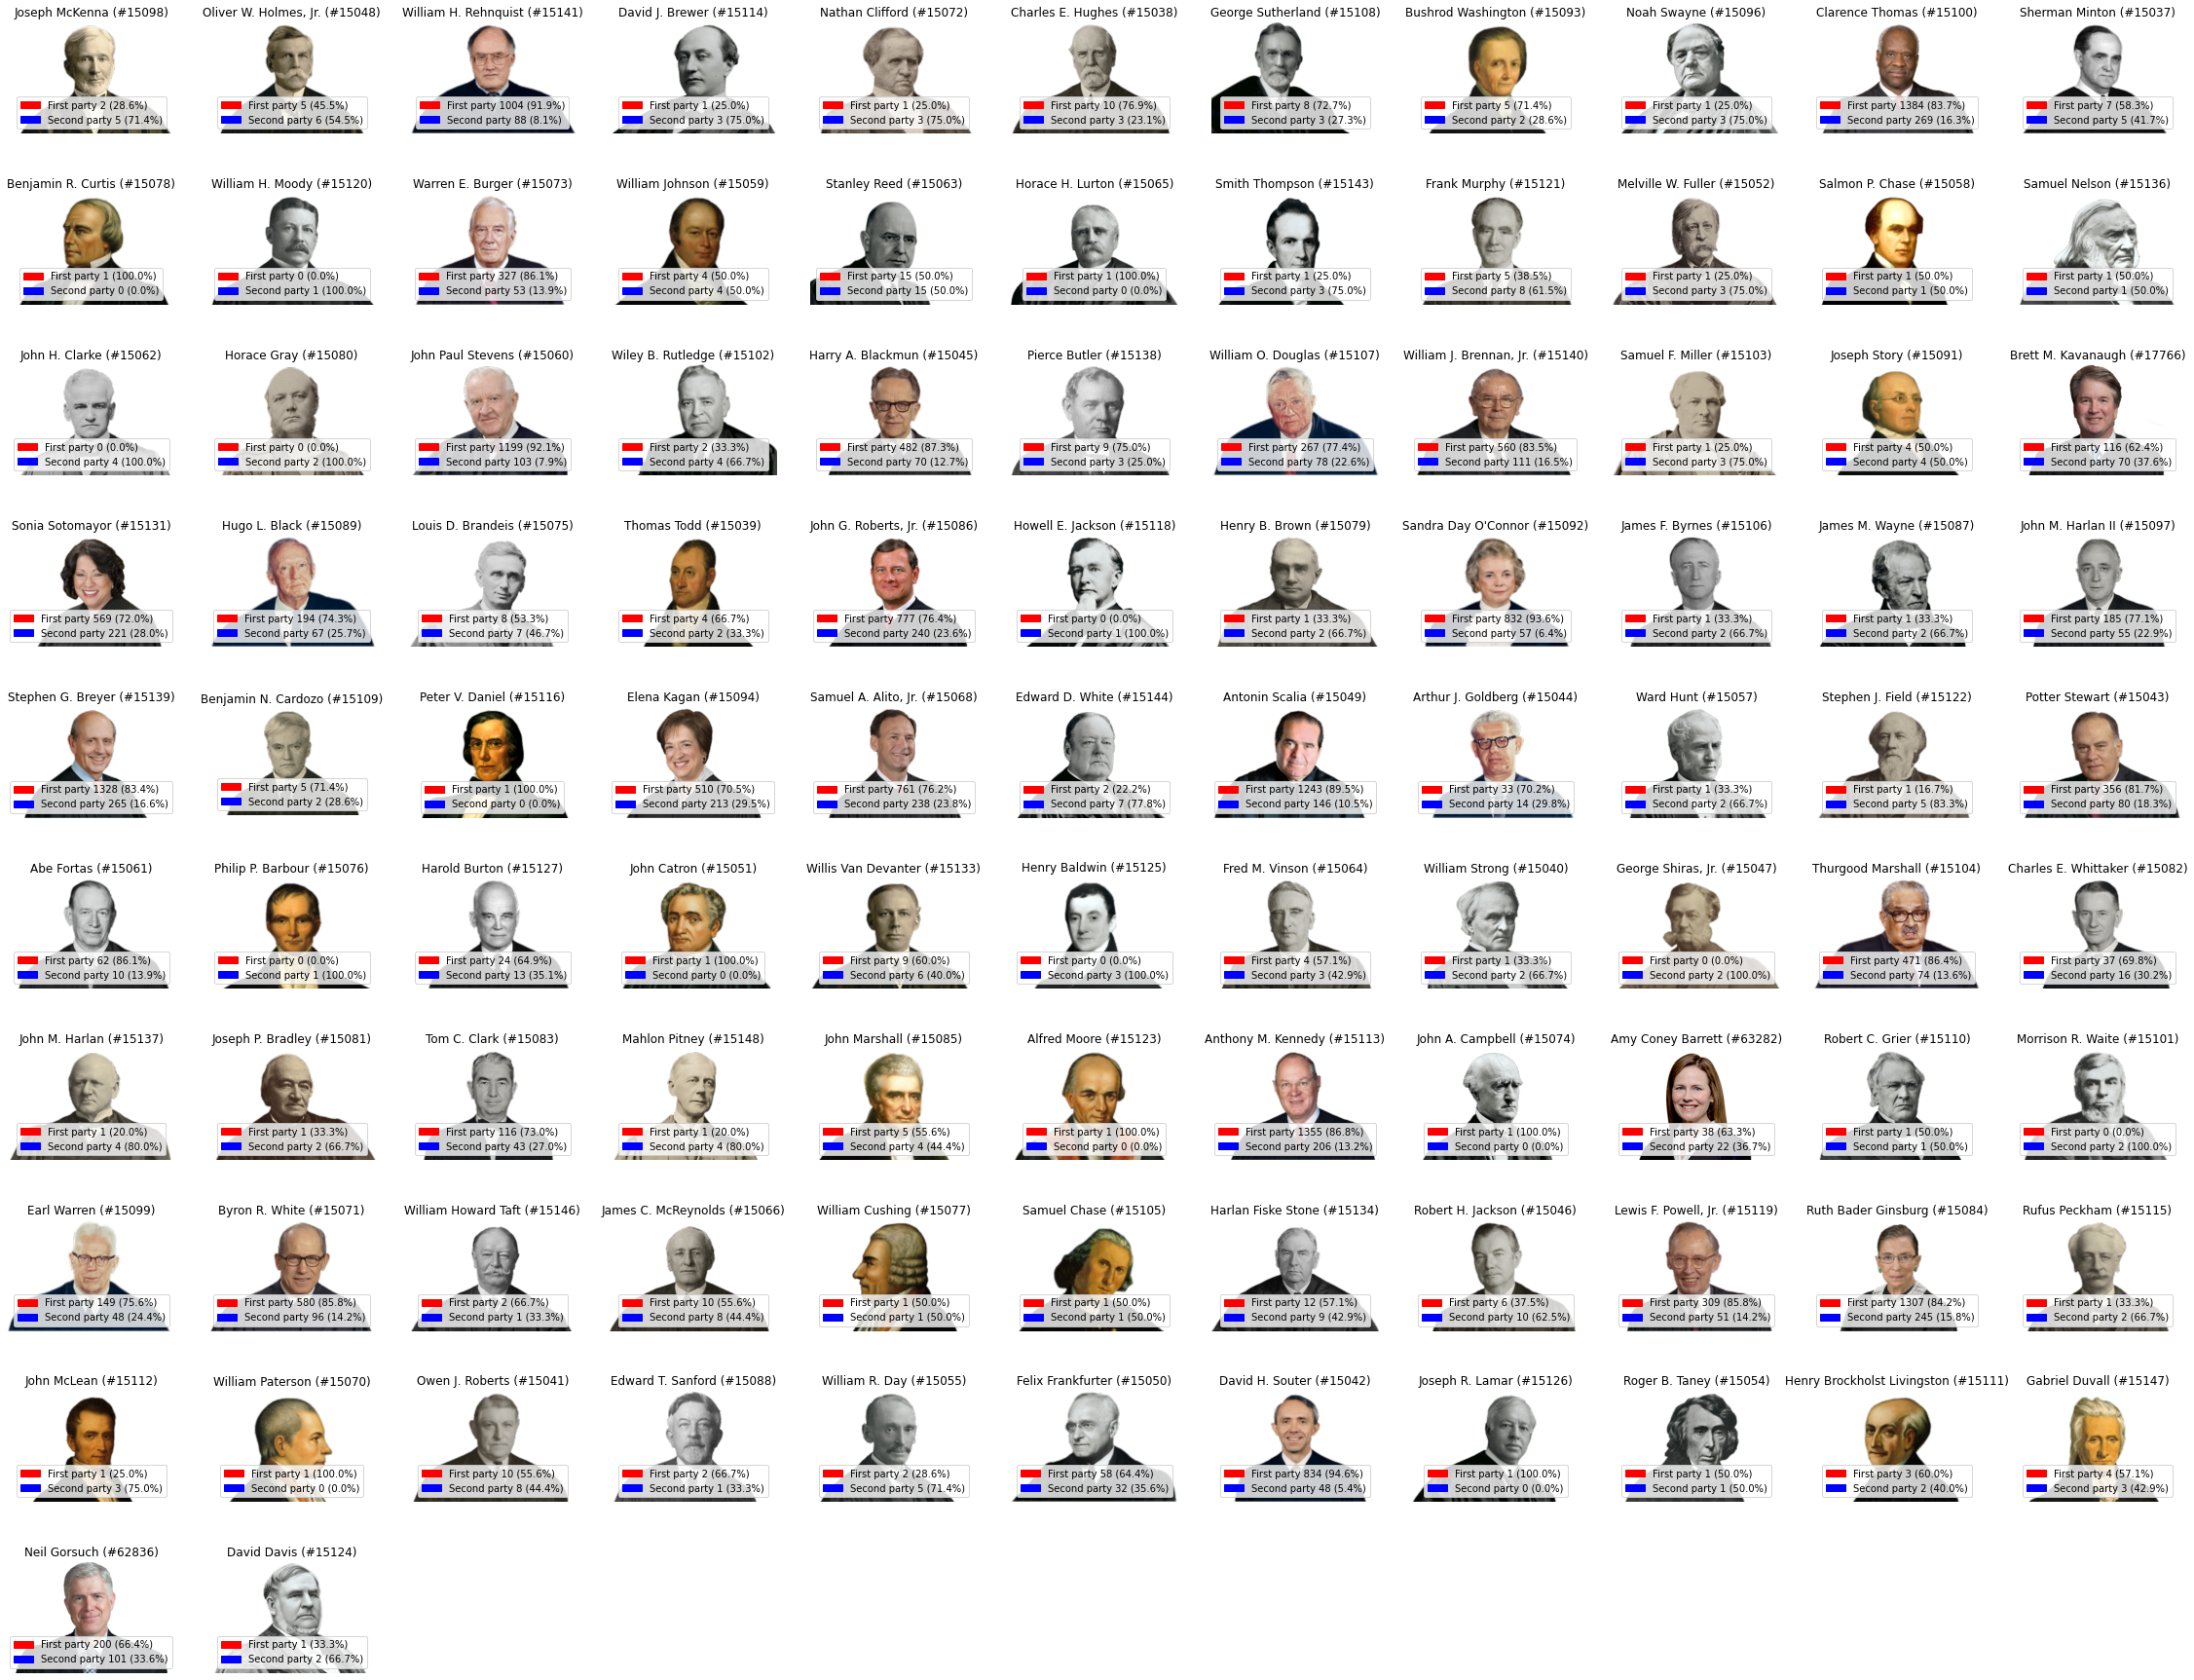

In [77]:
display_statistics(deciders)

Those two plots highlight two very important things: 

* Our dataset spread in a very wide time window : the various trials may have not been following the same laws
* Some people are very informative and others have too little experience to be informative

## Base Models

For our base model, we will only consider the following features: `first_party_type`, `second_party_type`, `facts_of_the_case`, `decision_type`, `province_name` as well as the new `heard_by` and `decided_by` features we designed to build the model. As stated in the challenge definition at the start of the notebook, our task is to predict the `winning_index` column.

#### Preparing the data and choosing the columns

In [80]:
final_df = df.copy()
final_df = final_df.assign(province_name=final_df['province_name'].fillna('N/A'))
final_df = final_df.assign(heard_by=df_hearers)
final_df = final_df.assign(decided_by=df_deciders)

In [140]:
# Splitting into train and test datasets
df_public_train, df_public_test = train_test_split(final_df, test_size=0.2, random_state=57)

In [137]:
# Constructing the features and the outputs that we will consider in the base model
_target_column_name = 'winning_index'
_ignore_column_names = ['conclusion', 'votes', 'majority_vote', 'minority_vote', 'winning_party', 'disposition', 'decision_type', 'unconstitutionality']

y_train = df_public_train[_target_column_name].values
X_train = df_public_train.drop([_target_column_name] + _ignore_column_names, axis=1)

y_test = df_public_test[_target_column_name].values
X_test = df_public_test.drop([_target_column_name] + _ignore_column_names, axis=1)

#### Base Model: Naive Bayes

In [138]:
# Select the columns of the pandas dataframe
class SelectColumnsTransformer():
  def __init__(self, columns=None):
    self.columns = columns

  def transform(self, X, **transform_params):
    cpy_df = X[self.columns].copy()
    return cpy_df

  def fit(self, X, y=None, **fit_params):
    return self

  def fit_transform(self, X, y=None):
    return self.fit(X, y).transform(X)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# TF-IDF/Multilabel transform the text inputs
class ColumnsTextVectorizer():
  def __init__(self, columns_text=None, columns_multilabel=None):
    self.columns_text = columns_text
    self.columns_multilabel = columns_multilabel
    self.vectorizers = {
        c : TfidfVectorizer() for c in columns_text
    }
    for c in self.columns_multilabel:
      self.vectorizers[c] = MultiLabelBinarizer()

  def transform(self, X, **transform_params):
    # Transform texts and multi labels
    texts = []
    for c in self.columns_text + self.columns_multilabel:
      X_tmp = self.vectorizers[c].transform(X[c])
      if c in self.columns_text:
        X_tmp = X_tmp.todense()
      texts.append(X_tmp)
    # Transform non-text
    non_texts = X[[c for c in X.columns if c not in self.columns_text + self.columns_multilabel]].values
    # Concatenate everything
    return np.concatenate(texts + [non_texts], axis=1)

  def fit(self, X, y=None, **fit_params):
    # Fit the vectorizers
    for c in self.columns_text + self.columns_multilabel:
      # print(self.vectorizers[c])
      # print('hi')
      self.vectorizers[c].fit(X[c])
    return self

  def fit_transform(self, X, y=None):
    return self.fit(X, y).transform(X)

In [141]:
input_columns = ['first_party_type', 'second_party_type', 'facts_of_the_case', 'province_name','heard_by','decided_by']

# Build the pipeline
pipeline = Pipeline([
    ('columns_selection', SelectColumnsTransformer(columns=list(input_columns))),
    ('vectorization', ColumnsTextVectorizer(
        columns_text=['first_party_type', 'second_party_type', 'facts_of_the_case',  'province_name',],
        columns_multilabel=['heard_by', 'decided_by']

    )),
    ('classifier', MultinomialNB())
])

# Fit the classifier
pipeline = pipeline.fit(X_train, y_train)

In [142]:
# Predict
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.97      0.92       418
           2       0.37      0.11      0.16        66

    accuracy                           0.85       484
   macro avg       0.62      0.54      0.54       484
weighted avg       0.80      0.85      0.82       484



#### Base Model: K-Nearest Neighbors

In [144]:
# Build the pipeline
pipeline_knn = Pipeline([
    ('columns_selection', SelectColumnsTransformer(columns=list(input_columns))),
    ('vectorization', ColumnsTextVectorizer(
        columns_text=['first_party_type', 'second_party_type', 'facts_of_the_case',  'province_name',],
        columns_multilabel=['heard_by', 'decided_by']

    )),
    ('classifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

# Fit the classifier
pipeline_knn = pipeline_knn.fit(X_train, y_train)

In [145]:
# Predict
y_pred = pipeline_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.91      0.90       418
           2       0.33      0.27      0.30        66

    accuracy                           0.83       484
   macro avg       0.61      0.59      0.60       484
weighted avg       0.81      0.83      0.82       484



Now that we developed two base models, it's up to you to carry on with the challenge!  

Keep in mind that the manipulations done in this notebook are for demonstration purposes only, don't hesitate to be creative with your solutions!